# Phys 434 Lab 3 -- Aureliano Liu

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

In [4]:
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

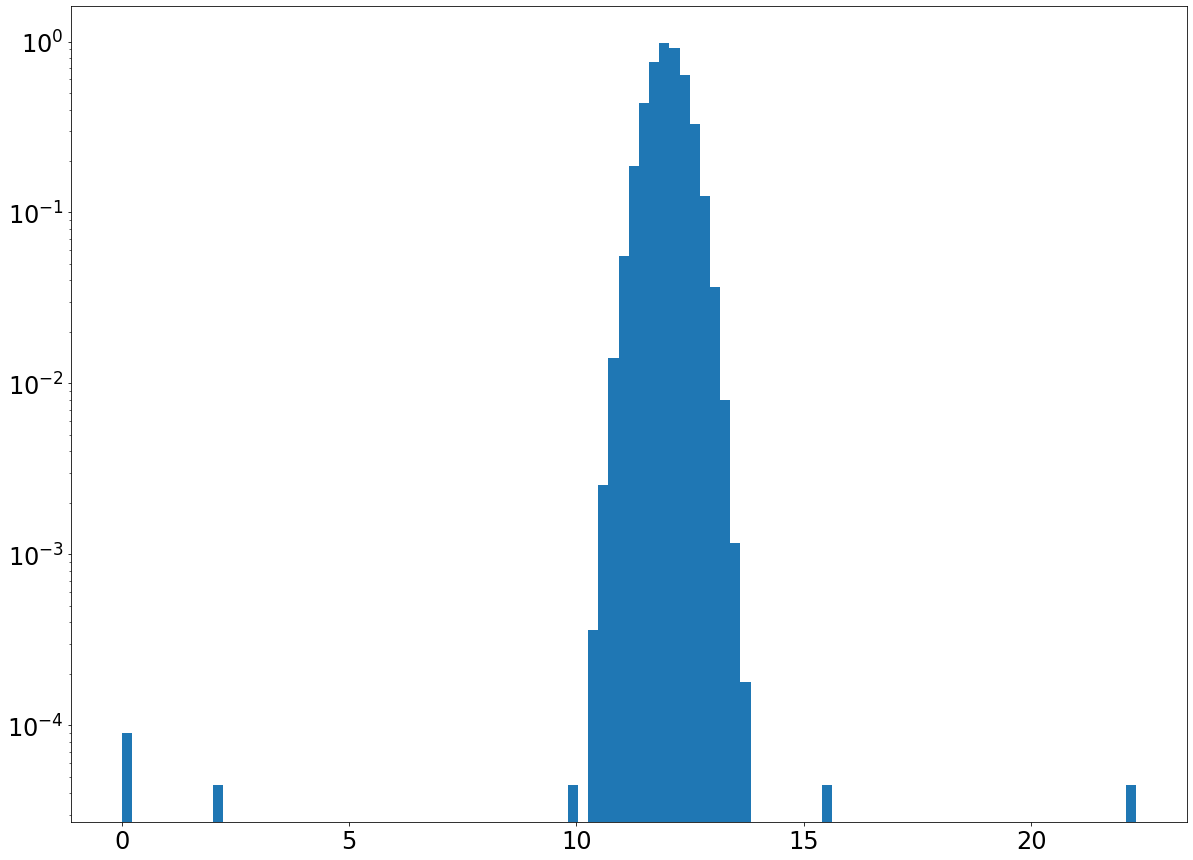

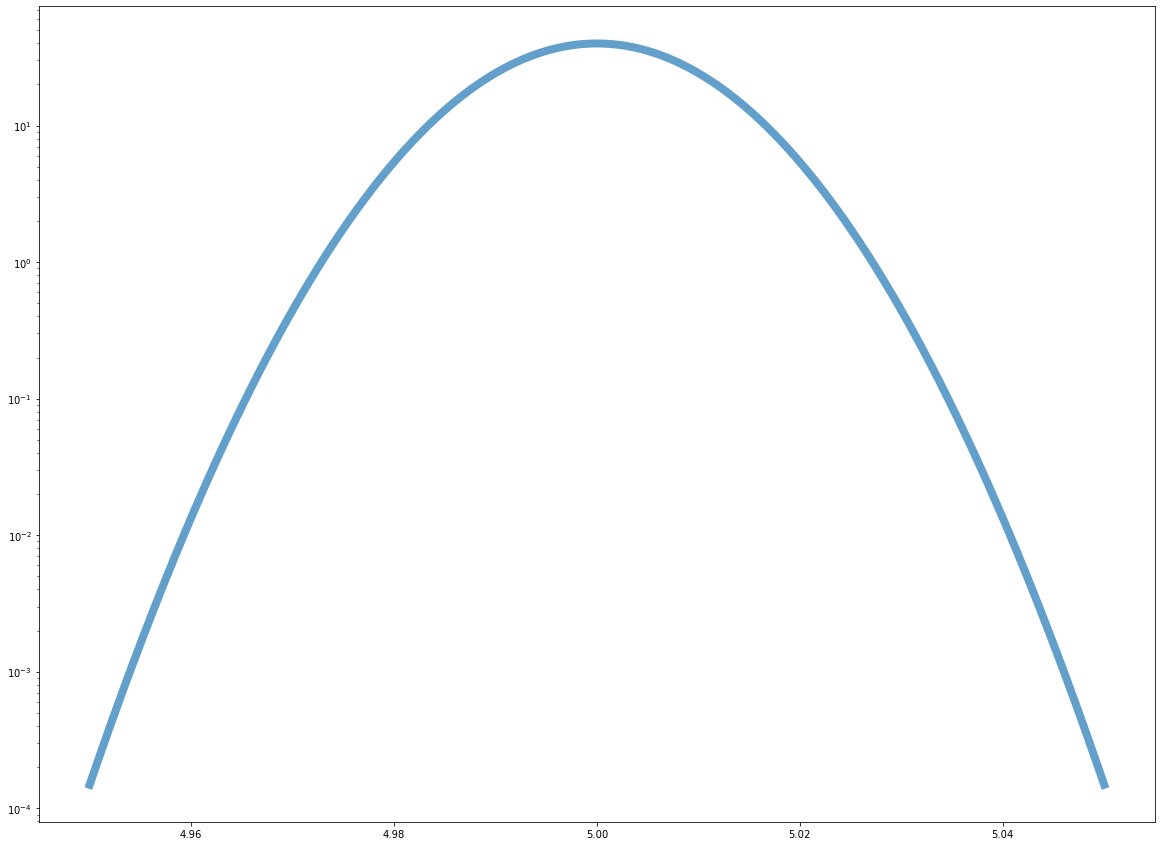

In [75]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.show()
fig2,ax2 = plt.subplots()
x = np.linspace(4.95,5.05,1000)
plt.yscale("log")
ax2.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)

### Question 1 

#### Part A

1. From the plots above, we can see the outliers are between 0 and 25, and they can be seen clearly on the log plot 

2. The statistical question we can ask is : \
what is the probability that the measurement we read is from the normal background instead of an outlier in this case

3. In math we can say : if we read a point with value of $x_0$ \
Integral :  $$1 - \int_{-\infty}^{x_0} pdf(x) dx $$

4. Code as below

In [78]:
true = np.array([])
false = np.array([])

for value in d:
    det = stats.norm.ppf(1-stats.norm.cdf(value,loc = 12., scale = 0.4))
    if(np.abs(det) > 5):
        false = np.append(false,value)
    else:
        true = np.append(true,value)

In [79]:
d = {"True T": [1000000,0],"Bad T" : [3,5]}
pd.DataFrame(data=d,index=["Your test good","Your test Bad"])

,True T,Bad T
Your test good,1000000,3
Your test Bad,0,5


#### Part B

By changing the threshold of sigma, we can conclude that :\
Decreasing the threshold of sigma will mark more true T to be tested as bad. 

#### Part C

There are 3 bad data points marked as Good in this case with 5 sigma threshold \
Increasing the threshold of sigma will make more bad data points being marked as good 

### Question 2

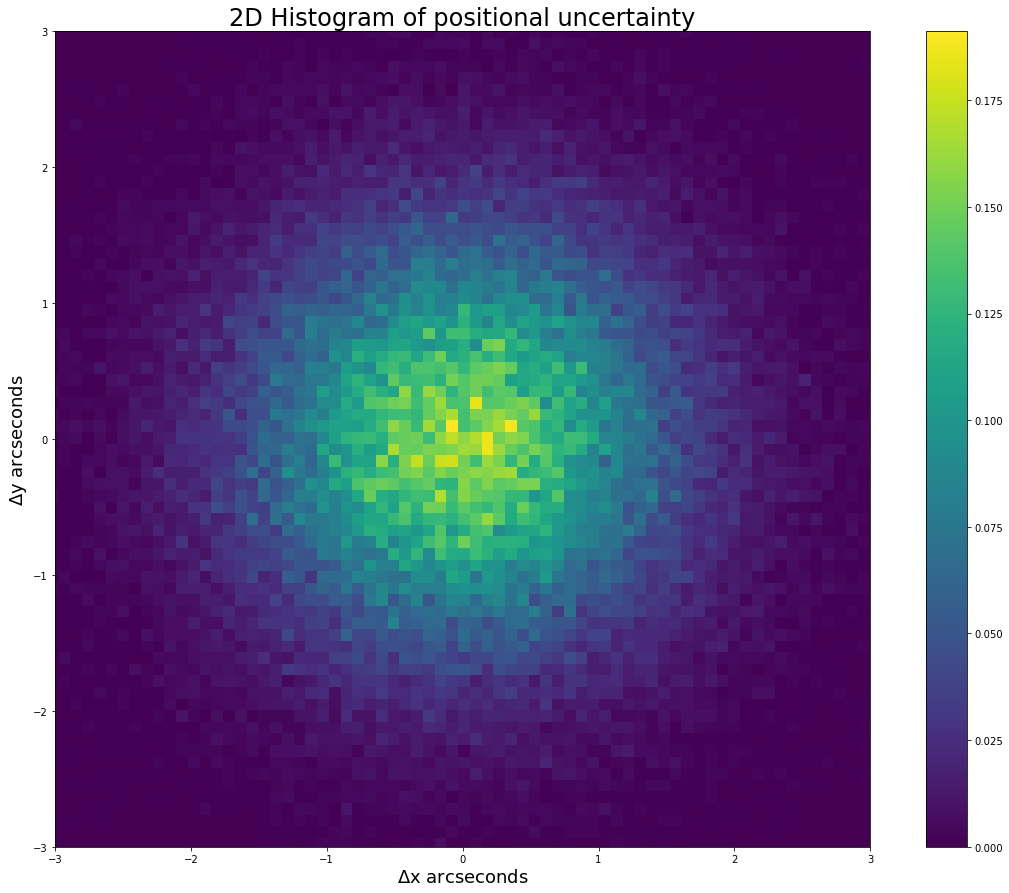

In [80]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

We know from the HW 3 that the distance distribition of 2D Gaussian is Rayleigh \
So we can plot the Rayleigh's pdf out :

In [82]:
x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99),1000)
pdf = stats.rayleigh.pdf(x)

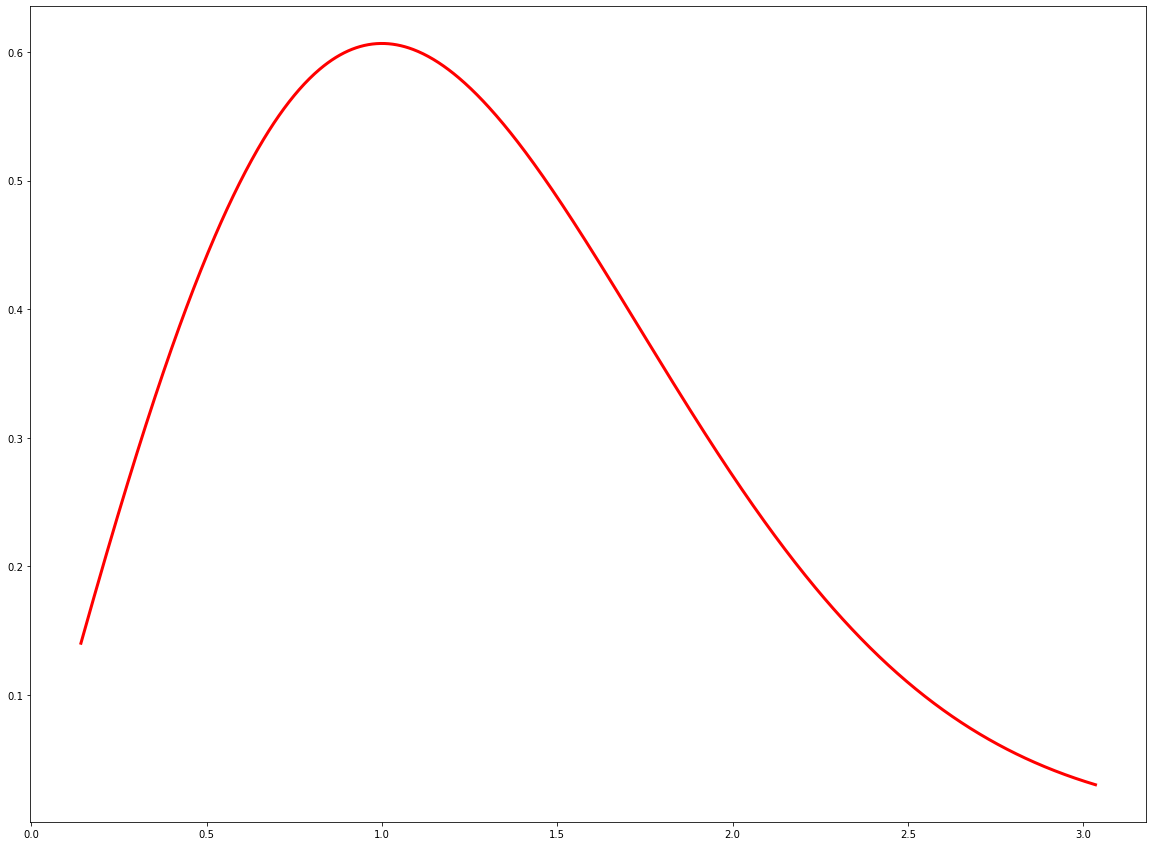

In [85]:
fig,ax = plt.subplots()
ax.plot(x,pdf,'r',lw = 3)

In words, we can ask : \
What minimal measurement in the rayleigh distribution do we need so that the sigma value of such reading is more than 5 significance

Integral :  $$1 - \int_{-\infty}^{???} pdf(x) dx  >> 5 sigma $$

In [88]:
sig5 = 1/3.5e6
det = stats.rayleigh.ppf(1 - sig5)
det

5.489676406965609

#### So the distance we need for 5 sigma detection is around 5.5

### Question 3

#### Part 1

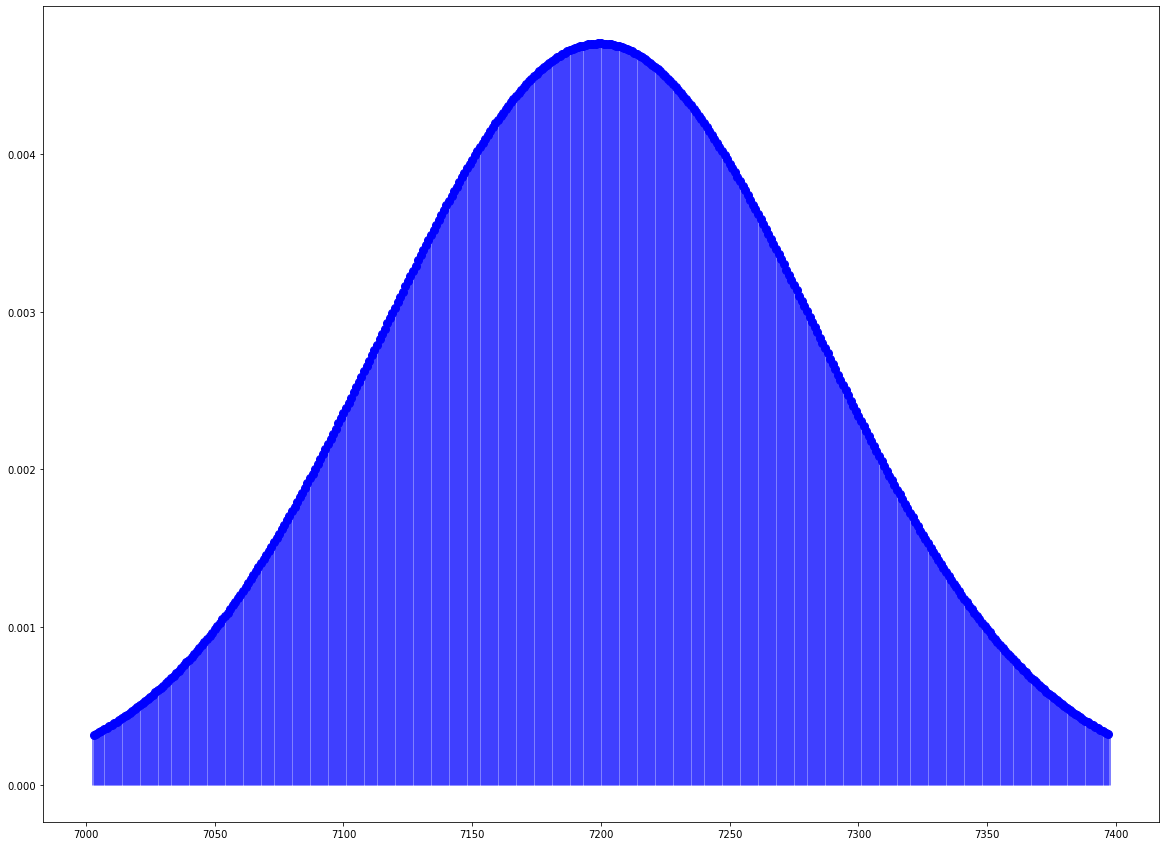

In [109]:
mu = 7200
fig,ax = plt.subplots()
x = np.arange(stats.poisson.ppf(0.01, mu),stats.poisson.ppf(0.99, mu),1)
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

In [113]:
stats.norm.ppf(1 - stats.poisson.cdf(6800,mu))

4.750747965778662

#### Since the sigma value is less than 5 sigma, the reading of 6800 is insignificant